In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss, accuracy_score, precision_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer, make_column_selector

In [2]:
glass = pd.read_csv("D:/Training/Academy/ML(Python)/Cases/Glass_Identification/Glass.csv")
X, y = glass.drop('Type', axis=1), glass['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25,
                                                   stratify=y)

In [6]:
features = [2, 3, 4, 5]
n_est = [25, 50, 100, 150, 200]
scores = []
for f in features:
    for n in n_est:
        rf = RandomForestClassifier(random_state=25, max_features=f, n_estimators=n)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        scores.append([f, n, f1_score(y_test, y_pred, average='macro')])
df_scores = pd.DataFrame( scores, columns=['features','trees', 'score'] )
df_scores.sort_values('score', ascending=False)

,features,trees,score
8,3,150,0.804986
11,4,50,0.784531
2,2,100,0.784430
3,2,150,0.784430
1,2,50,0.784430
10,4,25,0.769093
6,3,50,0.754350
5,3,25,0.747683
9,3,200,0.746890
14,4,200,0.741341


Feature Importance

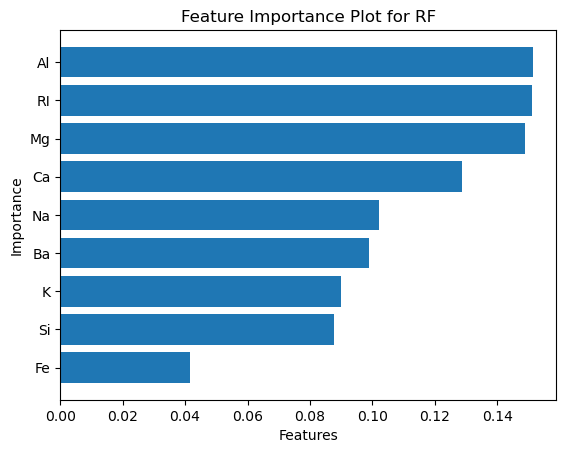

In [7]:
best_model = RandomForestClassifier(random_state=25, max_features=3, n_estimators=150)
best_model.fit(X, y)
df_imp = pd.DataFrame({'Feature':list(X.columns), 'Importance': best_model.feature_importances_}) 
df_imp = df_imp.sort_values('Importance')
plt.barh(df_imp['Feature'], df_imp['Importance'])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title('Feature Importance Plot for RF')
plt.show()